In [2]:
import torch

In [3]:
x = torch.rand(10)

In [4]:
x.size()

torch.Size([10])

In [5]:
tmp = torch.FloatTensor([23,34,24,.5])
tmp.size()

torch.Size([4])

In [6]:
from PIL import Image
import numpy as np


In [7]:
img = np.array(Image.open('/Users/hannahzhang/Downloads/img.jpg').resize((244,244)))

In [8]:
img_tensor = torch.from_numpy(img)

In [9]:
img_tensor.size()

torch.Size([244, 244, 3])

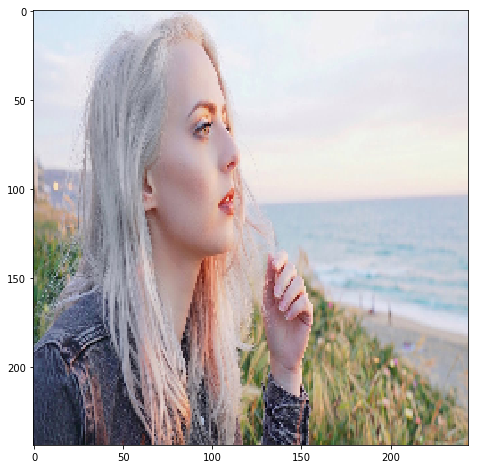

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.imshow(img)


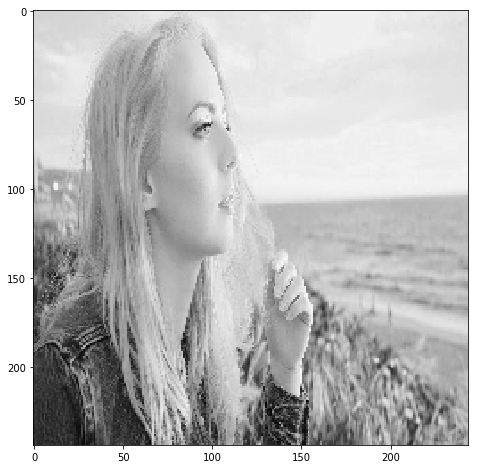

In [14]:
plt.imshow(img_tensor[:,:,0].numpy())

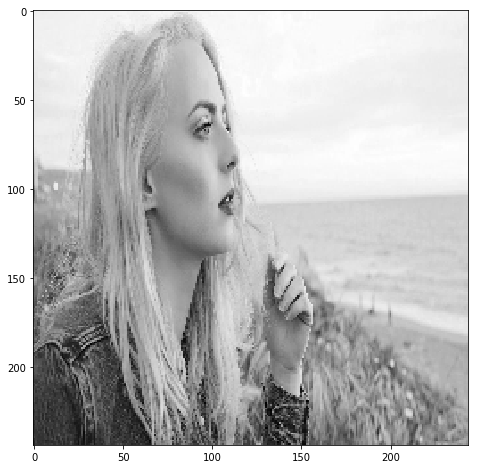

In [15]:
plt.imshow(img_tensor[:,:,1].numpy())

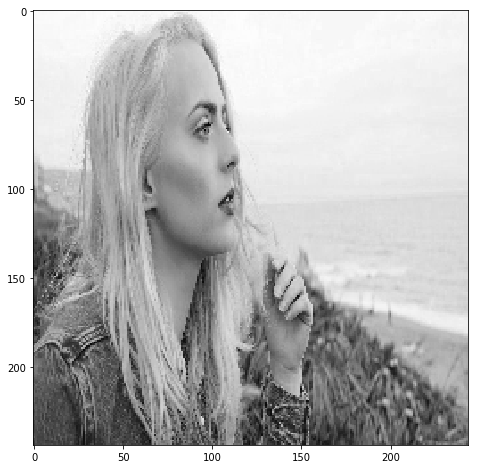

In [16]:
plt.imshow(img_tensor[:,:,2].numpy())

In [17]:
sacles = torch.eye(3,3)

In [18]:
sacles[0,1]

tensor(0.)

In [19]:
x = torch.autograd.Variable(torch.ones(2,2), requires_grad=True)
y = x.mean()
y.backward()

In [20]:
print(x.grad_fn)

None


In [21]:
x.data

tensor([[ 1.,  1.],
        [ 1.,  1.]])

In [22]:
y.grad_fn

In [23]:
def get_data():
    train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.11])
    train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.456,1.65,2.904,2.42,2.94,1.3])
    dtype = torch.FloatTensor
    X = torch.autograd.Variable(torch.from_numpy(train_X).type(dtype), requires_grad=False).view(17,1)
    y = torch.autograd.Variable(torch.from_numpy(train_Y).type(dtype), requires_grad=False)
    
    return X,y

In [24]:
def get_weights():
    w = torch.autograd.Variable(torch.randn(1), requires_grad=True)
    b = torch.autograd.Variable(torch.randn(1), requires_grad=True)
    return w,b

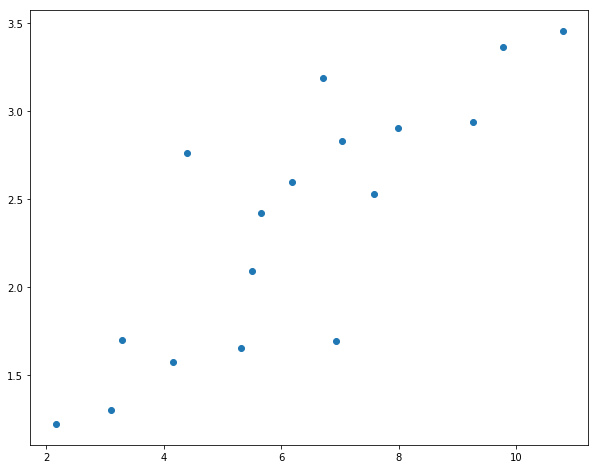

In [25]:
X,y = get_data()
plt.scatter(X, y)

In [26]:
def simple_newtwork(x):
    y_pred = torch.matmul(x, w) + b
    return y_pred

In [27]:
def loss_fn(y, y_pred):
    loss = (y_pred - y).pow(2).sum()
    for param in [w, b]:
        if not param.grad is None: param.grad.data.zero_()
    loss.backward()
    return loss.data[0]

In [28]:
def optimize(learning_rate):
    w.data -= learning_rate * w.grad.data
    b.data -= learning_raet * b.grad.data

In [54]:
from torch.utils.data import Dataset
import glob
class DogsAndCatsDataset(Dataset):
    def __init__(self, root_dir, size=(224,224)):
        self.files = glob.glob(root_dir)
        self.size = size
    def __len__(self):
        return len(self.files)
    def __getitem__(self, idx):
        img = np.asarray(Image.open(self.files[idx]).resize(self.size))
        label = self.files[idx].split('.')[0]
        return img,label
    

In [ ]:
import torch.utils as tu
dogsdset = DogsAndCatsDataset('/Users/hannahzhang/Downloads/train/*.jpg')
dataloader = tu.data.DataLoader(dogsdset, batch_size=32, num_workers=2)